## Terminologies   

- **Activation Function**: *decides whether a neuron should be activated or not.*
- **Input Layer**: *Layer to be used as an entry point into a Network*
- **Output Layer**: *Maps the neurons to the number of outputs for the network*
- **Hidden Layers**: *an artificial neural network that is a layer in between input layers and output layers.*
- **Weight Parameter**: *transforms input data within the network's hidden layers.*
- **Bias Parameter**: *an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron.*
- **Gradient Descent Algorithm**:
$ X = X - LearningRate * \frac{d}{dx}f(X) $
- **Model Overfitting**: *the model tries to learn too many details in the training data along with the noise from the training data.*

## How to Build and Train a Neural Network

To Build:
- **Declare the number of layers**: *The number of hidden neurons should be between the size of the input layer and the size of the output layer.*
- **The type of each layer**: *Input, output, hidden.*
- **The size of each layer**: *Based on size of data (nodes).*
- **The activation of each layer**: *e.g. ReLu*

To Train:
- **Define a cost function / loss function**. This function evaluates the model’s performance with current set of parameters. Small cost indicates good performance.: *The cost function is the technique of evaluating “the performance of our algorithm/model”. The loss function is the function that computes the distance between the current output of the algorithm and the expected output.*
- **Use gradient descent as the training algorithm. Acknowledge that the gradient descent method can end at a local minimum instead of a global minimum.**
- **In practice, people tend to use improved version of the basic gradient descent method. ADAM is a good choice in practice.** : *Gradient descent can be updated to use an automatically adaptive step size for each input variable using a decaying average of partial derivatives, called Adam.*
- **Detect overfitting: use the performance on a validation set to detect.**
- **Prevent overfitting: stop when it is not yet overfitting, or modify the model to induce a simpler model.**

## The Math Related to Neural Network
- **Each input neuron takes a feature value from the input data.**
- **For each neuron in a hidden layer, it calculates a weighted sum of the value from the previous layer. This is the input of that neuron.**
- **The neuron applies its activation function to the input.**
- **The neuron broadcast the output to the next layer.**
- **The output from the output layer is the final output.**

### Calculating the Weighted Sum
$$ WeightedSum = (Input_0 * Weight_0) + (Input_1 * Weight_1) + Weight_{Node} $$
$$ Output = \frac{1}{1 + e^{WeightedSum}} $$

![download](download.png)

Inputs: $ 0, 1 $ | Node: $ H_1 $
$$ WeightedSum = (0 * 4.83) + (1 * -4.83) - 2.82 = -7.65 $$
$$ Output = \frac{1}{1 + e^{-7.65}} = 4.758 * 10^{-4} $$


Inputs: $ 0, 1 $ | Node: $ H_2 $
$$ WeightedSum = (0 * -4.63) + (1 * 4.6) - 2.74 = 1.86 $$
$$ Output = \frac{1}{1 + e^{1.86}} = 0.8652 $$ 

Inputs: $ 0, 1 $ | Node: $ O $
> At Node $ O $, our inputs change to $ H_1 $ and $ H_2 $
$$ WeightedSum = (4.758 * 10^{-4} * 5.73) + (0.8652 * 5.83) - 2.86 = 2.187 $$
$$ Output = \frac{1}{1 + e^{2.187}} = 0.8991 → "1" $$ 

## How to code a Neural Network

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
np.set_printoptions(precision=3, suppress=True)
tf.config.list_physical_devices('GPU')

[]

In [8]:
# Load the data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
# 0 - 255
X_train, X_test = X_train / 255, X_test / 255
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
"""
scalers = 1, 2, 3, 4
.
.
.
.
.
tensor = [[[1], [2], [3]]]
"""

(28, 28)

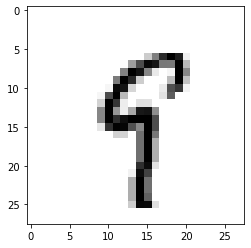

In [19]:
idx = 54321
img = X_train[idx, :, :]
plt.imshow(img, cmap=plt.cm.binary)
img.shape

In [15]:
from sklearn.linear_model import LogisticRegression # Classifier
model_lr = LogisticRegression()
model_lr.fit(X_train.reshape([60_000, 28 * 28]), y_train)

LogisticRegression()

In [23]:
predictions = model_lr.predict(X_test.reshape([10_000, 28 * 28]))
print("First 20:", predictions[:20])

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))

First 20: [7 2 1 0 4 1 4 9 2 7 0 0 9 0 1 3 9 7 3 4]
Accuracy: 0.7793


In [25]:
# Build NN
nn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 1D 28x28
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
# Logits -> R
index = 123
pred = nn(X_train[index:(index + 1)])
print(pred)

tf.Tensor([[-0.001  0.001  0.    -0.001 -0.    -0.    -0.     0.001  0.    -0.001]], shape=(1, 10), dtype=float32)


In [28]:
prob = tf.nn.softmax(pred)
print(prob)

tf.Tensor([[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]], shape=(1, 10), dtype=float32)


In [29]:
class_pred = np.argmax(prob)
print(class_pred)

7


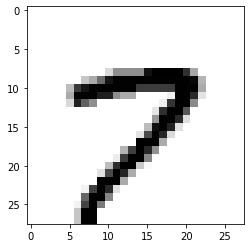

In [30]:
plt.imshow(X_train[index].reshape([28, 28]), cmap=plt.cm.binary)
plt.show()

In [31]:
# Prediction error
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[index:(index + 1)], pred).numpy()

2.3012192

In [32]:
nn.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [34]:
nn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1158 - accuracy: 0.9652
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1066 - accuracy: 0.9682
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0977 - accuracy: 0.9705
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0913 - accuracy: 0.9725
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0784 - accuracy: 0.9753
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0739 - accuracy: 0.9776
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0684 - accuracy: 0.9787
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.061

In [35]:
nn.evaluate(X_test, y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.0855 - accuracy: 0.9745


[0.08551837503910065, 0.9745000004768372]

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []
raw = nn(X_test).numpy()
for idx in range(raw.shape[0]):
    logits = raw[idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    y_pred.append(class_pred)

print(y_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [37]:
print(confusion_matrix(y_test, y_pred))

[[ 968    0    3    1    1    1    2    1    2    1]
 [   0 1120    3    1    0    2    4    2    3    0]
 [   6    1 1006    3    4    0    3    3    6    0]
 [   0    0    5  982    0    8    0    7    3    5]
 [   1    0    3    0  953    0    5    4    2   14]
 [   4    0    0    7    2  871    5    0    1    2]
 [   6    2    0    0    4    5  941    0    0    0]
 [   1    4   13    2    1    0    0  995    2   10]
 [  13    0    7    6    4    5    5    4  926    4]
 [   2    2    0    4    6    2    2    4    4  983]]
